### Credit Card Anomaly Detection
### Michae14

# Table of Contents
1. Data Prepration
2. Insights From Data
3. Feature Engineering
   - 3.1. Feature 1: The ratio to average amount by merchant
   - 3.2. Feature 2: The ratio to median amount by merchant
   - 3.3. Feature 3: The ratio to average amount by merchant and month
   - 3.4. Feature 4: The ratio to median amount by merchant and month
   - 3.5. Feature 5: The ratio to average amount by merchant and day of week
   - 3.6. Feature 6: The ratio to average amount by vendor
   - 3.7. Feature 7: The ratio to median amount by vendor
   - 3.8. Feature 8: The ratio to average amount by vendor and month
   - 3.9. Feature 9: The ratio to median amount by vendor and month
   - 3.10. Feature 10: The ratio to average amount by merchant and day of week
   - 3.11. Feature 11: The ratio to average amount by cardholder and merchant
   - 3.12. Feature 12: The ratio to median amount by cardholder and merchant
   - 3.13. Feature 13: The ratio to average amount by cardholder, merchant, and month
   - 3.14. Feature 14: The ratio to median amount by cardholder, merchant, and month
   - 3.15. Feature 15: The ratio to average amount by cardholder, merchant, and day of week
4. Final Analysis

In [2]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

/var/folders/1d/38xtg69x6r507pqz8c2q64bm0000gn/T/ipykernel_54576/1132722477.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. Data Preparation

In [3]:
df = pd.read_csv('/Users/michae14/Desktop/Anomaly Detection/EDA2/purchase_credit_card.csv')
df.head(5)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [4]:
# Check the dimension of the dataset
df.shape

(442458, 11)

In [5]:
df.columns

Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')

In [6]:
df.describe()

,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


After briefly examining the dataset, we can find out that there is a total of 442,458 rows and 11 columns of the data in the dataset, including columns that indicates the time, people, vendor, and amount throught a specific time range. 

According to the summary table, we can also know that the average amount of all the transacction in the dataset is about 424.99 and the median amount of all the transaction is 104.89. 

In [7]:
# change column names 
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

### 1.1 Create date fields

In [8]:
#Creating separate Year and Month columns for future feature engineering
# Converting Transaction_Date and Posted_date from Python Object data type to datetime
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

/var/folders/1d/38xtg69x6r507pqz8c2q64bm0000gn/T/ipykernel_54576/121906042.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
/var/folders/1d/38xtg69x6r507pqz8c2q64bm0000gn/T/ipykernel_54576/121906042.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Posted_Date']=pd.to_datetime(df['Posted_Date'])


Day_of_Week
Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: count, dtype: int64

In [9]:
df.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday


### 2. Insights from Data

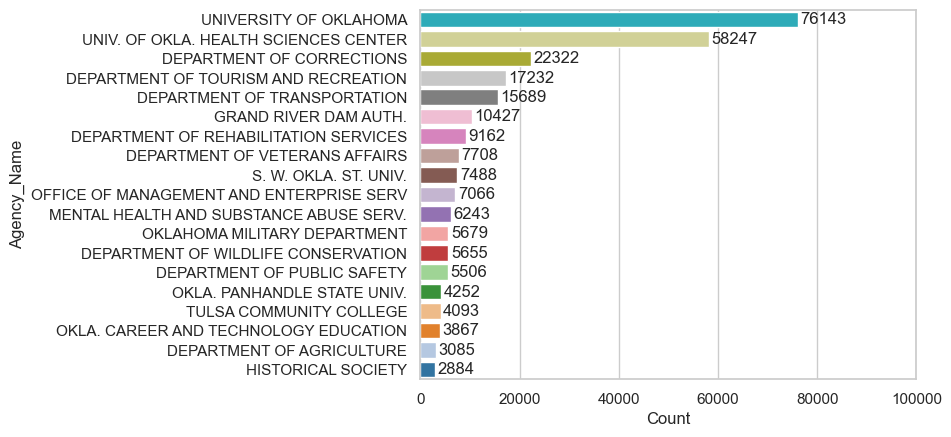

In [10]:
# Summarize the count statistics by agency_name in df_count
df_count = df['Agency_Name'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Agency_Name','Count']

fig = px.bar(df_count, x='Agency_Name', y='Count', color = 'Agency_Name', width=1000, height=400)
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="Agency_Name", x="Count", data=df_count[1:20], hue = 'Count', legend=False, palette='tab20')

# Add data labels to each bar with a buffer and adjusted text position
for index, value in enumerate(df_count['Count'][1:20]):
    ax.text(value + 500, index, f'{value}', va='center')  # Added buffer of 500 to avoid cutting off

# Set x-axis limits to 10,000
ax.set_xlim(0, 100000)

# Show the plot
plt.show()

We can find out that the University of Oklahoma has the most transactions, it has a toal of 76143 records. Follow after the University of Oklahoma, Univ. of Okla health science center and Department of Corrections has the second and third most transactions.

### 3. Feature Engineering

Common sense tells us the comparison should be at "Agency_Name" and "Merchant_Category" level. So, we can aggregate to the Aggrecy_Name level and card holder level then build features. 

### 3.1. Feature 1: The ratio to average amount by merchant

The logic of creating this feature is to detect whether the cardholder abuse the credit card based on the comparision of his agency and merchant category. If one cardholders spend much higher money than the average money other cardholders spent in his agency, it might indicate there is a problem in this transaction. So creating a benchmark that indicate the ratio to the average amount by merchant will be helpful to detect the outliner.

In [11]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

AVG_amount
Agency_Name                     Merchant_Category                                     
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED  115.120000
                                CATALOG MERCHANTS                           -53.344286
                                COMPUTER NETWORK/INFORMATION SERVICES        18.340000
                                DRUG STORES AND PHARMACIES                  153.450000
                                GROCERY STORES,AND SUPERMARKETS              74.525455
...                                                                                ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                  118.054000
                                TRAVEL AGENCIES                              24.253731
                                TROPICANA RESORT AND CASINO                 481.600000
                                UNITED AIRLINES                             310.547368
                                WYNDHAM HOTELS                               93.282857

[8427 rows x 1 columns]

After calculating the average amount by merchant, then we can left join the average amount data with the original credit card payment dataset. So that we can add a new column that indicate the average amount by merchant and conduct the ratio calculation later on. All the features that created later on will follow this left join procedure. 

In [12]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
df1.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,427.634060
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,378.629890
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,392.459376
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,59.832149
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,271.213133


In [13]:
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['agency_merchant_avg_ratio_amount'] = np.where(df1['AVG_amount']==0,0, df1['Amount'] / df1['AVG_amount'])
df1['agency_merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999724
std           7.225363
min       -2735.680000
25%           0.177145
50%           0.515301
75%           1.102916
max        2735.680000
Name: agency_merchant_avg_ratio_amount, dtype: float64

Then, we can cut the data by percentile for making visualization to reflect the distribution of the ratio to the average amount. All the feature later on will also follow this procedure for plotting. 

In [14]:
# cut by percentile for plotting
var = 'agency_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut(df1[var],percentile)
df1[['agency_merchant_avg_ratio_amount_D']]

,agency_merchant_avg_ratio_amount_D
0,"(1.298, 3.515]"
1,"(0.515, 1.298]"
2,"(0.133, 0.515]"
3,"(1.298, 3.515]"
4,"(0.133, 0.515]"
...,...
442453,"(0.515, 1.298]"
442454,"(0.133, 0.515]"
442455,"(0.0212, 0.133]"
442456,"(8.71, 2735.68]"


(0.0, 160000.0)

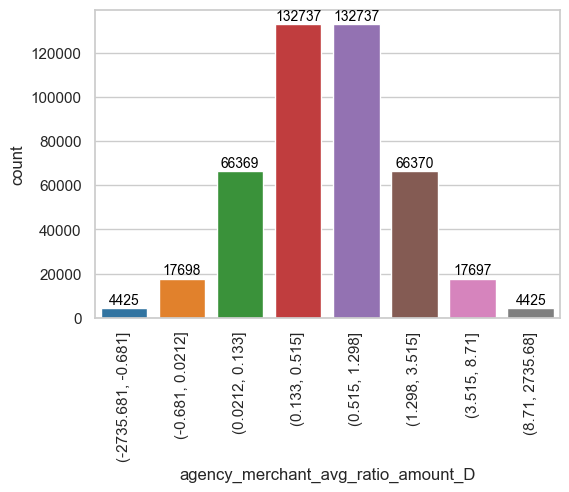

In [15]:
plt.figure(figsize=(6,4))
g = sns.countplot(x= "agency_merchant_avg_ratio_amount_D", data=df1, hue = 'agency_merchant_avg_ratio_amount_D', legend=False, palette='tab10')
plt.xticks(rotation=90)

for p in g.patches:
    g.annotate(f'{int(p.get_height())}',  # Convert height to integer and use as label
               (p.get_x() + p.get_width() / 2., p.get_height()),  # Position in the center of each bar
               ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# Set x-axis limits to 10,000
ax.set_ylim(0, 160000)

In the end, take a look at those records, we can identify some extreme cases, such as those records are 2 times of the average or those records fall between the 95% percentile and 100 percentile. This might indicate that cardholder may abuse their corporate cards at that transaction. 

In [16]:
df1['df1_outliners'] = df1['agency_merchant_avg_ratio_amount'] > 3.515

df1[df1['agency_merchant_avg_ratio_amount'] > 3.515].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount_D,df1_outliners
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]",True
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]",True
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,392.641168,9.122833,"(8.71, 2735.68]",True
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,493.267124,7.774692,"(3.515, 8.71]",True
60,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dipboye,K,GENERAL PURCHASE,525.0,CARE COMMUNICATIONS,2013-07-25,2013-07-26,TELECOMMUNICATION SERVICES,2013,7,30,Thursday,86.240345,6.087638,"(3.515, 8.71]",True


### 3.2. Feature 2: The ratio to median amount by merchant

In [17]:
# create median spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount']
stat_by_agency

Median_amount
Agency_Name                     Merchant_Category                                        
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED         115.12
                                CATALOG MERCHANTS                                   38.16
                                COMPUTER NETWORK/INFORMATION SERVICES               18.34
                                DRUG STORES AND PHARMACIES                         153.45
                                GROCERY STORES,AND SUPERMARKETS                     61.57
...                                                                                   ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                         113.74
                                TRAVEL AGENCIES                                     25.00
                                TROPICANA RESORT AND CASINO                        481.60
                                UNITED AIRLINES                                    510.60
                                WYNDHAM HOTELS                                      87.00

[8427 rows x 1 columns]

In [18]:
# add the new feature average spending to the dataset 
df2 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
df2.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,250.000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,262.090
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,171.510
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,32.485
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,110.115


In [19]:
# Feature 2: ratio of amount spending and median spending by merchant category 
df2['agency_merchant_median_ratio_amount'] = np.where(df2['Median_amount']==0,0, df2['Amount'] / df2['Median_amount'])
df2['agency_merchant_median_ratio_amount'].describe()

count    442458.000000
mean          4.952685
std        1078.581350
min       -1003.176471
25%           0.466090
50%           1.000000
75%           2.121102
max      528116.052705
Name: agency_merchant_median_ratio_amount, dtype: float64

In [20]:
# cut by percentile for plotting
var = 'agency_merchant_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut(df2[var],percentile)

(0.0, 160000.0)

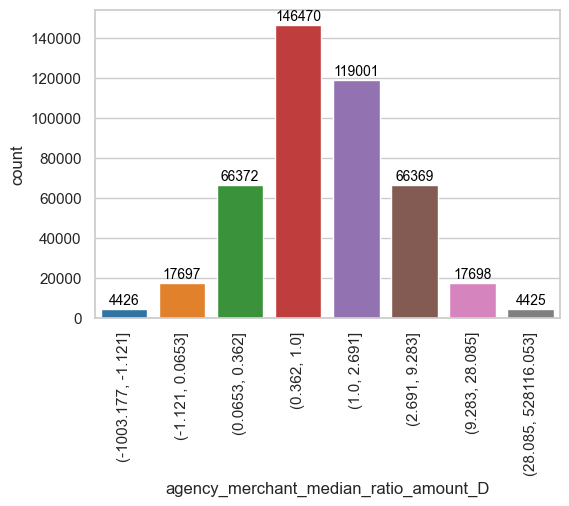

In [21]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_median_ratio_amount_D", data=df2, hue = 'agency_merchant_median_ratio_amount_D', legend=False, palette='tab10')
plt.xticks(rotation=90)

for p in g.patches:
    g.annotate(f'{int(p.get_height())}',  # Convert height to integer and use as label
               (p.get_x() + p.get_width() / 2., p.get_height()),  # Position in the center of each bar
               ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# Set x-axis limits to 10,000
ax.set_ylim(0, 160000)

In [22]:
df2['df2_outliners'] = df2['agency_merchant_median_ratio_amount'] > 9.283

### 3.3. Feature 3: The ratio to average amount by merchant and month

The feature 3 and 4 is try to aggregate one more column, and this new column will be month. The reasoning for that is I expect sometimes some purchase might have seasonal trend, for example booking a hotel in some month might be more expensive due to the seasonal trend of the hotel demand. So in this cases, creating such benchmark might be helpful for us to detect the outliners. 

In [23]:
# create average spending group by agency and merchant category 
stat_by_agency_and_month = df.groupby(['Agency_Name', 'Merchant_Category', 'Month'])['Amount'].mean()
stat_by_agency_and_month = pd.DataFrame(stat_by_agency_and_month)
stat_by_agency_and_month.columns = ['AVG_amount']
stat_by_agency_and_month

AVG_amount
Agency_Name                     Merchant_Category                          Month            
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 11     115.120000
                                CATALOG MERCHANTS                          7     -637.750000
                                                                           8      669.080000
                                                                           9     -334.540000
                                                                           10     334.540000
...                                                                                      ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            9      260.450000
                                                                           10     523.800000
                                                                           12     199.633333
                                WYNDHAM HOTELS                             1        0.000000
                                                                           12     130.596000

[39888 rows x 1 columns]

In [24]:
# add the new feature to the dataset 
df3 = pd.merge(df, stat_by_agency_and_month, how='left', on=['Agency_Name', 'Merchant_Category', 'Month'])
df3.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,483.467473
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,363.316000
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,392.222463
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,54.011368
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,257.878577


In [25]:
df3['agency_merchant_month_avg_ratio_amount'] = np.where(df3['AVG_amount']==0,0, df3['Amount'] / df3['AVG_amount'])
df3['agency_merchant_month_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.993083e-01
std      5.961952e+13
min     -2.447706e+16
25%      2.017647e-01
50%      5.984763e-01
75%      1.125213e+00
max      3.059633e+16
Name: agency_merchant_month_avg_ratio_amount, dtype: float64

In [26]:
# cut by percentile for plotting
var = 'agency_merchant_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut(df3[var],percentile)
df3[['agency_merchant_month_avg_ratio_amount_D']]

,agency_merchant_month_avg_ratio_amount_D
0,"(1.34, 3.417]"
1,"(0.598, 1.34]"
2,"(0.151, 0.598]"
3,"(1.34, 3.417]"
4,"(0.151, 0.598]"
...,...
442453,"(0.151, 0.598]"
442454,"(0.151, 0.598]"
442455,"(0.0239, 0.151]"
442456,"(8.05, 3.0596329968448308e+16]"


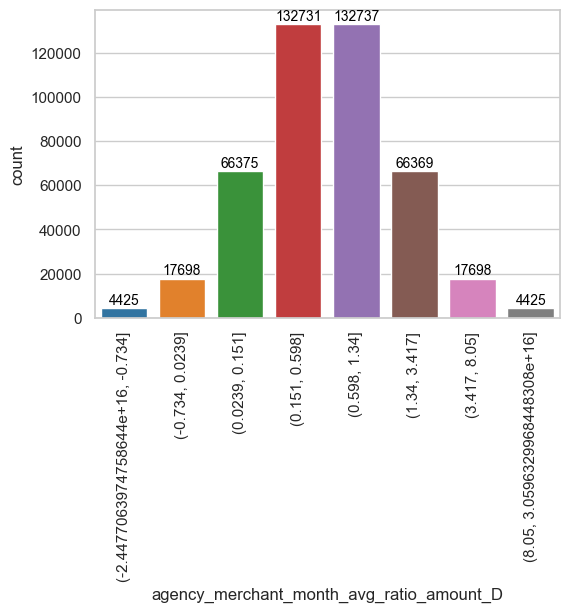

In [27]:
plt.figure(figsize = (6,4))
g = sns.countplot(x = 'agency_merchant_month_avg_ratio_amount_D', data = df3, hue = 'agency_merchant_month_avg_ratio_amount_D', legend=False, palette='tab10')
plt.xticks(rotation=90)

for p in g.patches:
    g.annotate(f'{int(p.get_height())}',  # Convert height to integer and use as label
               (p.get_x() + p.get_width() / 2., p.get_height()),  # Position in the center of each bar
               ha = 'center', va = 'baseline', fontsize = 10, color = 'black', xytext=(0, 3), textcoords = 'offset points')

In [28]:
df3['df3_outliners'] = df3['agency_merchant_month_avg_ratio_amount'] > 3.417

### 3.4. Feature 4: The ratio to median amount by merchant and month

In [29]:
# create average spending group by agency and merchant category 
stat_by_agency_and_month = df.groupby(['Agency_Name', 'Merchant_Category', 'Month'])['Amount'].median() 
stat_by_agency_and_month = pd.DataFrame(stat_by_agency_and_month)
stat_by_agency_and_month.columns = ['Median_amount']
stat_by_agency_and_month

Median_amount
Agency_Name                     Merchant_Category                          Month               
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 11            115.12
                                CATALOG MERCHANTS                          7            -637.75
                                                                           8             669.08
                                                                           9            -334.54
                                                                           10            334.54
...                                                                                         ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            9             510.60
                                                                           10            523.80
                                                                           12            181.80
                                WYNDHAM HOTELS                             1               0.00
                                                                           12             87.00

[39888 rows x 1 columns]

In [30]:
# add the new feature to the dataset 
df4 = pd.merge(df, stat_by_agency_and_month, how='left', on=['Agency_Name', 'Merchant_Category', 'Month'])
df4.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,365.000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,432.240
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,189.660
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,30.605
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,107.450


In [31]:
df4['agency_merchant_month_median_ratio_amount'] = np.where(df4['Median_amount']==0,0, df4['Amount'] / df4['Median_amount'])
df4['agency_merchant_month_median_ratio_amount'].describe()

count    442458.000000
mean          5.010047
std        1195.766096
min      -29642.000000
25%           0.500000
50%           1.000000
75%           1.912717
max      598420.505983
Name: agency_merchant_month_median_ratio_amount, dtype: float64

In [32]:
# cut by percentile for plotting
var = 'agency_merchant_month_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut(df4[var],percentile)

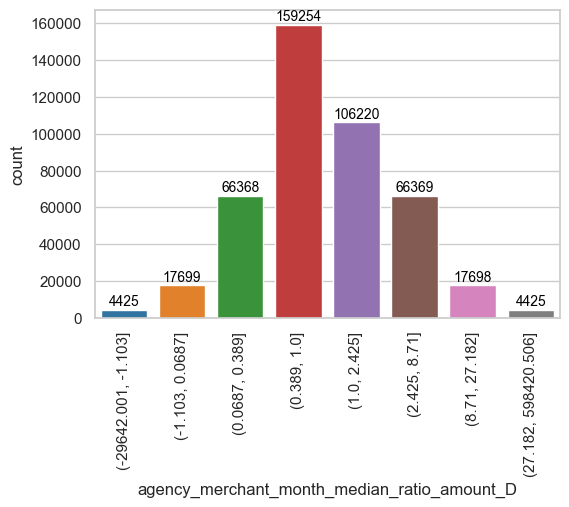

In [33]:
plt.figure(figsize = (6,4))
g = sns.countplot(x = 'agency_merchant_month_median_ratio_amount_D', data = df4, hue = 'agency_merchant_month_median_ratio_amount_D', legend=False, palette='tab10')
plt.xticks(rotation=90)

for p in g.patches:
    g.annotate(f'{int(p.get_height())}',  # Convert height to integer and use as label
               (p.get_x() + p.get_width() / 2., p.get_height()),  # Position in the center of each bar
               ha = 'center', va = 'baseline', fontsize = 10, color = 'black', xytext=(0, 3), textcoords = 'offset points')


In [34]:
df4['df4_outliners'] = df4['agency_merchant_month_median_ratio_amount'] > 8.7

### 3.5 Feature 5: The ratio to average amount by merchant and day of week

In this time, the new feature 5 and 6 is trying to aggregate the day_of_week column. The reasoning for that is I expect sometimes some purchase might have daily trend, for example booking a hotel in then weekend might be more expensive than the weekdays of the month. 

In [35]:
# create average spending group by agency and merchant category 
stat_by_agency_and_day = df.groupby(['Agency_Name', 'Merchant_Category', 'Day_of_Week'])['Amount'].mean() 
stat_by_agency_and_day = pd.DataFrame(stat_by_agency_and_day)
stat_by_agency_and_day.columns = ['AVG_amount']
stat_by_agency_and_day

AVG_amount
Agency_Name                     Merchant_Category                          Day_of_Week            
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED Friday       115.120000
                                CATALOG MERCHANTS                          Friday        31.330000
                                                                           Monday       334.540000
                                                                           Thursday    -269.590000
                                                                           Wednesday     38.160000
...                                                                                            ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            Thursday     331.466667
                                                                           Tuesday     -283.500000
                                                                           Wednesday    352.800000
                                WYNDHAM HOTELS                             Thursday      87.000000
                                                                           Tuesday      101.660000

[27574 rows x 1 columns]

In [36]:
# add the new feature average spending to the dataset 
df5 = pd.merge(df, stat_by_agency_and_day, how='left', on=['Agency_Name', 'Merchant_Category', 'Day_of_Week'])

df5['agency_merchant_day_avg_ratio_amount'] = np.where(df5['AVG_amount']==0,0, df5['Amount'] / df5['AVG_amount'])
df5['agency_merchant_day_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.986634e-01
std      3.091416e+15
min     -5.875565e+17
25%      1.938586e-01
50%      5.725592e-01
75%      1.115607e+00
max      5.875565e+17
Name: agency_merchant_day_avg_ratio_amount, dtype: float64

In [37]:
# cut by percentile for plotting
var = 'agency_merchant_day_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut(df5[var],percentile)
df5[['agency_merchant_day_avg_ratio_amount_D']]

,agency_merchant_day_avg_ratio_amount_D
0,"(1.317, 3.454]"
1,"(0.573, 1.317]"
2,"(0.146, 0.573]"
3,"(1.317, 3.454]"
4,"(0.146, 0.573]"
...,...
442453,"(1.317, 3.454]"
442454,"(0.573, 1.317]"
442455,"(0.0233, 0.146]"
442456,"(8.378, 5.875564958853576e+17]"


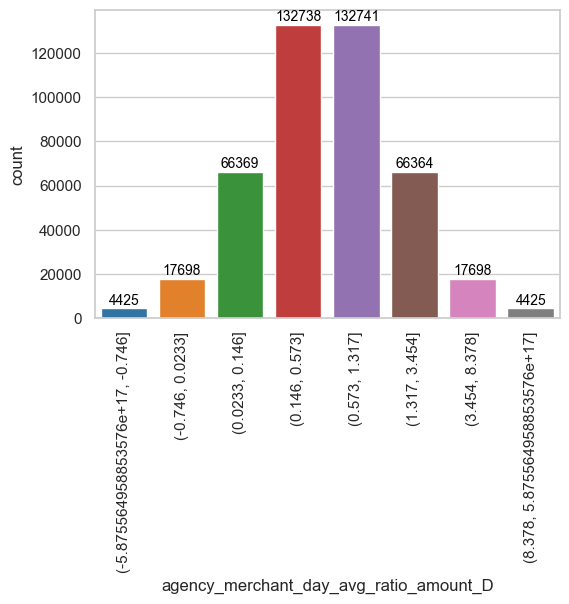

In [38]:
plt.figure(figsize = (6,4))
g = sns.countplot(x = 'agency_merchant_day_avg_ratio_amount_D', data = df5, hue = 'agency_merchant_day_avg_ratio_amount_D', legend=False, palette='tab10')
plt.xticks(rotation=90)

for p in g.patches:
    g.annotate(f'{int(p.get_height())}',  # Convert height to integer and use as label
               (p.get_x() + p.get_width() / 2., p.get_height()),  # Position in the center of each bar
               ha = 'center', va = 'baseline', fontsize = 10, color = 'black', xytext=(0, 3), textcoords = 'offset points')

In [39]:
df5['df5_outliners'] = df5['agency_merchant_day_avg_ratio_amount'] > 3.454

### 3.6. Feature 6: The ratio to average amount by vendor

Looking at the origin data, other than the 'Merchant_Category' column that indicates the category of the purchase, the column 'Vendor' might be another good column to create the benchmarks to detect the outliners. The column 'Vendor' suggest that where the cardholder make the purchase and buy the service. We can look the average or median amount of the spending in specfic vendor like Walmart or Sheraton Hotel and make the comparison. Sometimes, the average spending amount in Sheraton might be more expensive than other hotel due to the different level of the hotel services and experience. 

And the new feature of grouping by column 'Vendor' will aslo follow the procedures presented before and combine with columns 'Month' and 'Day_of_Week' to create new features for benchmarks. 

In [40]:
# create average spending group by agency and merchant category 
stat_by_vendor = df.groupby(['Agency_Name', 'Vendor'])['Amount'].mean()
stat_by_vendor = pd.DataFrame(stat_by_vendor)
stat_by_vendor.columns = ['AVG_amount']
stat_by_vendor

AVG_amount
Agency_Name                     Vendor                             
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS             92.500000
                                CDW GOVERNMENT           -53.344286
                                COUNTY BUILDING CE        58.440000
                                EMPIRE PAPER COMPANY     443.540000
                                GODADDY.COM               18.340000
...                                                             ...
`DEPARTMENT OF EDUCATION        WORKPLACEDY             2350.000000
                                WWW FOUNDATIONSINC COM   938.000000
                                WWW.LOGMEIN.COM          149.000000
                                WYNDHAM GARDEN HOTEL      93.282857
                                XPEDX-INTL PAPER         464.185000

[111917 rows x 1 columns]

In [41]:
# add the new feature average spending to the dataset 
df6 = pd.merge(df, stat_by_vendor, how='left', on=['Agency_Name', 'Vendor'])
df6.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,715.555556
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,471.909333
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,92.030833
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,62.416879
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,143.682017


In [42]:
df6['agency_vendor_avg_ratio_amount'] = np.where(df6['AVG_amount']==0,0, df6['Amount'] / df6['AVG_amount'])
df6['agency_vendor_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.931041e-01
std      1.963144e+14
min     -6.944551e+16
25%      3.399096e-01
50%      9.543105e-01
75%      1.040700e+00
max      6.424385e+16
Name: agency_vendor_avg_ratio_amount, dtype: float64

In [43]:
# cut by percentile for plotting
var = 'agency_vendor_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut(df6[var],percentile)
df6[['agency_vendor_avg_ratio_amount_D']]

,agency_vendor_avg_ratio_amount_D
0,"(1.222, 2.793]"
1,"(0.254, 0.954]"
2,"(1.222, 2.793]"
3,"(1.222, 2.793]"
4,"(0.254, 0.954]"
...,...
442453,"(0.0395, 0.254]"
442454,"(1.222, 2.793]"
442455,"(1.222, 2.793]"
442456,"(6.126, 6.424384868444013e+16]"


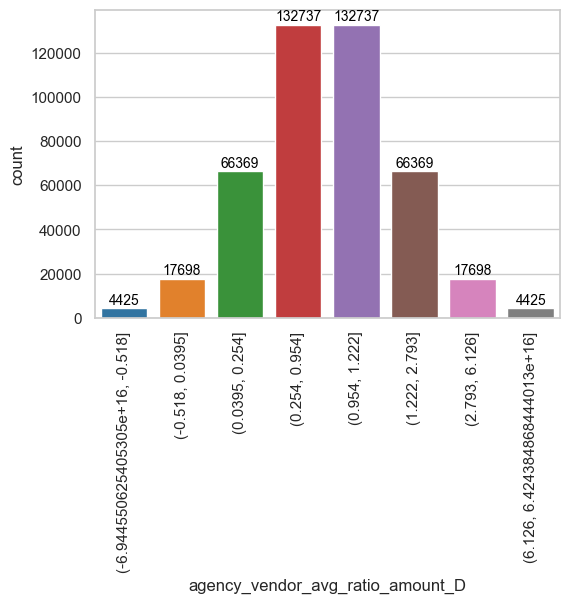

In [44]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x='agency_vendor_avg_ratio_amount_D', data = df6, hue='agency_vendor_avg_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add data labels to the bars
for p in g.patches:
    g.annotate(f'{int(p.get_height())}',  # Convert height to integer and use as label
               (p.get_x() + p.get_width() / 2., p.get_height()),  # Position in the center of each bar
               ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

In [45]:
df6['df6_outliners'] = df6['agency_vendor_avg_ratio_amount'] > 2.793

### 3.7. Feature 7: The ratio to median amount by vendor

In [46]:
# create average spending group by agency and merchant category 
stat_by_vendor = df.groupby(['Agency_Name', 'Vendor'])['Amount'].median()
stat_by_vendor = pd.DataFrame(stat_by_vendor)
stat_by_vendor.columns = ['Median_amount']
stat_by_vendor

Median_amount
Agency_Name                     Vendor                               
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS                  92.500
                                CDW GOVERNMENT                 38.160
                                COUNTY BUILDING CE             58.440
                                EMPIRE PAPER COMPANY          443.540
                                GODADDY.COM                    18.340
...                                                               ...
`DEPARTMENT OF EDUCATION        WORKPLACEDY                  2350.000
                                WWW FOUNDATIONSINC COM        938.000
                                WWW.LOGMEIN.COM               149.000
                                WYNDHAM GARDEN HOTEL           87.000
                                XPEDX-INTL PAPER              329.435

[111917 rows x 1 columns]

In [47]:
# add the new feature average spending to the dataset 
df7 = pd.merge(df, stat_by_vendor, how='left', on=['Agency_Name', 'Vendor'])
df7.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,675.000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,205.500
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,25.990
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,35.565
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,74.880


In [48]:
df7['agency_vendor_median_ratio_amount'] = np.where(df7['Median_amount']==0,0, df7['Amount'] / df7['Median_amount'])
df7['agency_vendor_median_ratio_amount'].describe()

count    442458.000000
mean          1.829670
std          21.214313
min        -683.920000
25%           0.658277
50%           1.000000
75%           1.446572
max       13119.000000
Name: agency_vendor_median_ratio_amount, dtype: float64

In [49]:
# cut by percentile for plotting
var = 'agency_vendor_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var],percentile)
df7[['agency_vendor_median_ratio_amount_D']]

,agency_vendor_median_ratio_amount_D
0,"(1.0, 1.792]"
1,"(1.792, 5.788]"
2,"(5.788, 16.542]"
3,"(1.792, 5.788]"
4,"(1.0, 1.792]"
...,...
442453,"(0.0903, 0.506]"
442454,"(1.792, 5.788]"
442455,"(1.0, 1.792]"
442456,"(16.542, 13119.0]"


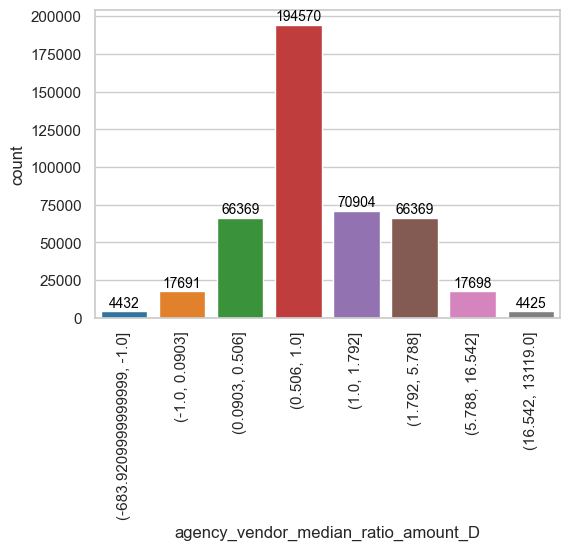

In [50]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_vendor_median_ratio_amount_D', data = df7, hue = 'agency_vendor_median_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add data labels to the bars
for p in g.patches:
    g.annotate(f'{int(p.get_height())}',  # Convert height to integer and use as label
               (p.get_x() + p.get_width() / 2., p.get_height()),  # Position in the center of each bar
               ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

In [51]:
df7['df7_outliners'] = df7['agency_vendor_median_ratio_amount'] > 5.788

df7_outliner = df7[df7['agency_vendor_median_ratio_amount'] > 5.788]
df7_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_vendor_median_ratio_amount,agency_vendor_median_ratio_amount_D,df7_outliners
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,25.99,6.380146,"(5.788, 16.542]",True
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,108.07,6.615527,"(5.788, 16.542]",True
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,135.25,17.650351,"(16.542, 13119.0]",True
80,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,64.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,10.32,6.297481,"(5.788, 16.542]",True
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,10.32,19.378876,"(16.542, 13119.0]",True


### 3.8 Feature 8: The ratio to average amount by vendor and month

In [52]:
# create average spending group by agency and merchant category 
stat_by_vendor_month = df.groupby(['Agency_Name', 'Vendor', 'Month'])['Amount'].mean()
stat_by_vendor_month = pd.DataFrame(stat_by_vendor_month)
stat_by_vendor_month.columns = ['AVG_amount']
stat_by_vendor_month

AVG_amount
Agency_Name                     Vendor               Month            
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS        12         92.500
                                CDW GOVERNMENT       7        -637.750
                                                     8         669.080
                                                     9        -334.540
                                                     10        334.540
...                                                                ...
`DEPARTMENT OF EDUCATION        WWW.LOGMEIN.COM      11        149.000
                                WYNDHAM GARDEN HOTEL 1           0.000
                                                     12        130.596
                                XPEDX-INTL PAPER     8         180.700
                                                     12        558.680

[189209 rows x 1 columns]

In [53]:
# add the new feature average spending to the dataset 
df8 = pd.merge(df, stat_by_vendor_month, how='left', on=['Agency_Name', 'Vendor', 'Month'])
df8.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,783.750000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,346.480000
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,165.820000
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,60.499148
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,166.680000


In [54]:
df8['agency_vendor_month_avg_ratio_amount'] = np.where(df8['AVG_amount']==0,0, df8['Amount'] / df8['AVG_amount'])
df8['agency_vendor_month_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.945976e-01
std      3.650538e+14
min     -1.266826e+17
25%      4.630255e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.263193e+17
Name: agency_vendor_month_avg_ratio_amount, dtype: float64

In [55]:
# cut by percentile for plotting
var = 'agency_vendor_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut(df8[var],percentile)
df8[['agency_vendor_month_avg_ratio_amount_D']]

,agency_vendor_month_avg_ratio_amount_D
0,"(1.121, 2.513]"
1,"(1.0, 1.121]"
2,"(0.337, 1.0]"
3,"(1.121, 2.513]"
4,"(0.337, 1.0]"
...,...
442453,"(0.0559, 0.337]"
442454,"(0.337, 1.0]"
442455,"(1.121, 2.513]"
442456,"(2.513, 5.36]"


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(-1.2668256604282766e+17, -0.449]'),
  Text(1, 0, '(-0.449, 0.0559]'),
  Text(2, 0, '(0.0559, 0.337]'),
  Text(3, 0, '(0.337, 1.0]'),
  Text(4, 0, '(1.0, 1.121]'),
  Text(5, 0, '(1.121, 2.513]'),
  Text(6, 0, '(2.513, 5.36]'),
  Text(7, 0, '(5.36, 1.2631932489255451e+17]')])

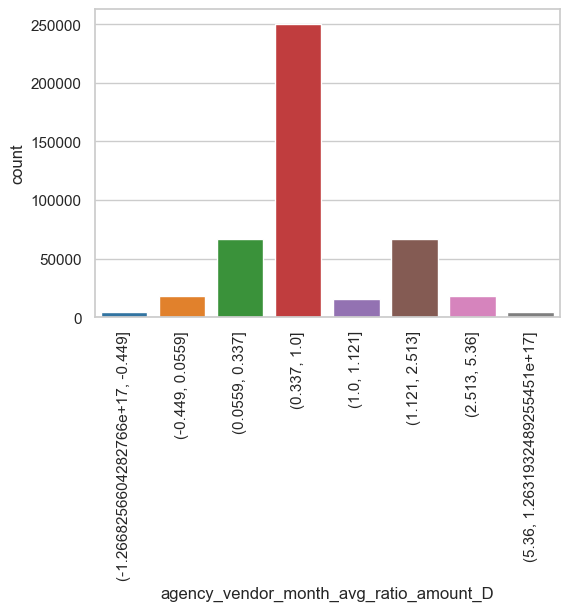

In [56]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_vendor_month_avg_ratio_amount_D', data = df8, hue = 'agency_vendor_month_avg_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

In [57]:
df8['df8_outliners'] = df8['agency_vendor_month_avg_ratio_amount'] > 2.513

df8_outliner = df8[df8['agency_vendor_month_avg_ratio_amount'] > 2.513]
df8_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_avg_ratio_amount_D,df8_outliners
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,237.945701,3.004635,"(2.513, 5.36]",True
54,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,M,GENERAL PURCHASE,159.97,GARMIN INTERNATIONAL,2013-07-24,2013-07-26,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,30,Wednesday,48.520000,3.296991,"(2.513, 5.36]",True
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,461.461429,5.173152,"(2.513, 5.36]",True
78,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Fokar,M,QIAPREP SPIN MINIPREP KIT KIT|RNEASY MINI PLAN...,1943.29,QIAGEN INC,2013-07-26,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,691.547143,2.810061,"(2.513, 5.36]",True
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,48.712222,4.105540,"(2.513, 5.36]",True


### 3.9. Feature 9: The ratio to median amount by vendor and month

In [58]:
# create average spending group by agency and merchant category 
stat_by_vendor_month = df.groupby(['Agency_Name', 'Vendor', 'Month'])['Amount'].median()
stat_by_vendor_month = pd.DataFrame(stat_by_vendor_month)
stat_by_vendor_month.columns = ['Median_amount']
stat_by_vendor_month

Median_amount
Agency_Name                     Vendor               Month               
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS        12             92.50
                                CDW GOVERNMENT       7            -637.75
                                                     8             669.08
                                                     9            -334.54
                                                     10            334.54
...                                                                   ...
`DEPARTMENT OF EDUCATION        WWW.LOGMEIN.COM      11            149.00
                                WYNDHAM GARDEN HOTEL 1               0.00
                                                     12             87.00
                                XPEDX-INTL PAPER     8             180.70
                                                     12            478.17

[189209 rows x 1 columns]

In [59]:
# add the new feature average spending to the dataset 
df9 = pd.merge(df, stat_by_vendor_month, how='left', on=['Agency_Name', 'Vendor', 'Month'])
df9.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,890.000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,346.480
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,165.820
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,35.880
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,116.765


In [60]:
df9['agency_vendor_month_median_ratio_amount'] = np.where(df9['Median_amount']==0,0, df9['Amount'] / df9['Median_amount'])
df9['agency_vendor_month_median_ratio_amount'].describe()

count    442458.000000
mean          1.798033
std          98.046931
min       -2087.333333
25%           0.822357
50%           1.000000
75%           1.166989
max       63226.000000
Name: agency_vendor_month_median_ratio_amount, dtype: float64

In [61]:
# cut by percentile for plotting
var = 'agency_vendor_month_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut(df9[var],percentile)
df9[['agency_vendor_month_median_ratio_amount_D']]

,agency_vendor_month_median_ratio_amount_D
0,"(0.632, 1.0]"
1,"(1.0, 1.449]"
2,"(0.632, 1.0]"
3,"(1.449, 4.829]"
4,"(1.0, 1.449]"
...,...
442453,"(0.632, 1.0]"
442454,"(1.0, 1.449]"
442455,"(1.0, 1.449]"
442456,"(15.044, 63226.0]"


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(-2087.3340000000003, -0.81]'),
  Text(1, 0, '(-0.81, 0.121]'),
  Text(2, 0, '(0.121, 0.632]'),
  Text(3, 0, '(0.632, 1.0]'),
  Text(4, 0, '(1.0, 1.449]'),
  Text(5, 0, '(1.449, 4.829]'),
  Text(6, 0, '(4.829, 15.044]'),
  Text(7, 0, '(15.044, 63226.0]')])

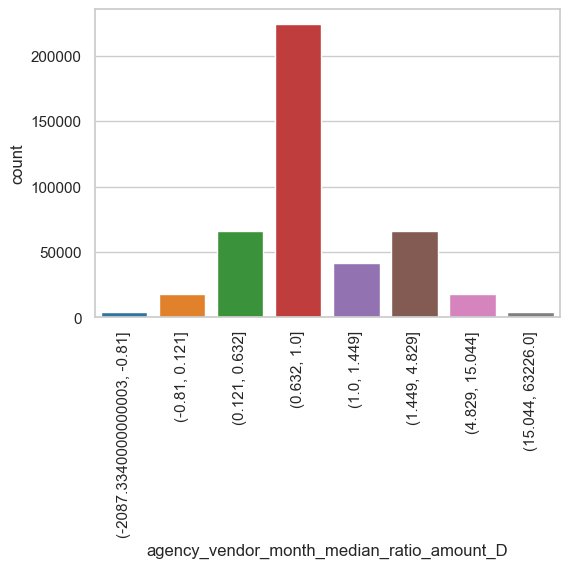

In [62]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_vendor_month_median_ratio_amount_D', data = df9, hue = 'agency_vendor_month_median_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

In [63]:
df9['df9_outliners'] = df9['agency_vendor_month_median_ratio_amount'] > 4.829

df9_outliner = df9[df9['agency_vendor_month_median_ratio_amount'] > 4.829]
df9_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_vendor_month_median_ratio_amount,agency_vendor_month_median_ratio_amount_D,df9_outliners
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,103.49,6.908300,"(4.829, 15.044]",True
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,103.75,23.009253,"(15.044, 63226.0]",True
78,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Fokar,M,QIAPREP SPIN MINIPREP KIT KIT|RNEASY MINI PLAN...,1943.29,QIAGEN INC,2013-07-26,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,367.47,5.288296,"(4.829, 15.044]",True
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,19.99,10.004502,"(4.829, 15.044]",True
87,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Robinson,D,GENERAL PURCHASE,390.00,NATIONAL SOCCER COACHES A,2013-07-29,2013-07-31,SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE...,2013,7,31,Monday,80.00,4.875000,"(4.829, 15.044]",True


### 3.10. Feature 10: The ratio to average amount by vendor and day of week

In [64]:
# create average spending group by agency and merchant category 
stat_by_vendor_day = df.groupby(['Agency_Name', 'Vendor', 'Day_of_Week'])['Amount'].mean()
stat_by_vendor_day = pd.DataFrame(stat_by_vendor_day)
stat_by_vendor_day.columns = ['AVG_amount']
stat_by_vendor_day

AVG_amount
Agency_Name                     Vendor               Day_of_Week            
ARDMORE HIGHER EDUCATION CENTER AGRI PRODUCTS        Monday            92.50
                                CDW GOVERNMENT       Friday            31.33
                                                     Monday           334.54
                                                     Thursday        -269.59
                                                     Wednesday         38.16
...                                                                      ...
`DEPARTMENT OF EDUCATION        WWW.LOGMEIN.COM      Tuesday          149.00
                                WYNDHAM GARDEN HOTEL Thursday          87.00
                                                     Tuesday          101.66
                                XPEDX-INTL PAPER     Saturday         250.99
                                                     Tuesday          677.38

[166529 rows x 1 columns]

In [65]:
# add the new feature average spending to the dataset 
df10 = pd.merge(df, stat_by_vendor_day, how='left', on=['Agency_Name', 'Vendor', 'Day_of_Week'])
df10.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,721.666667
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,357.276667
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,110.880000
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,59.119663
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,112.034667


In [66]:
df10['agency_vendor_day_avg_ratio_amount'] = np.where(df10['AVG_amount']==0,0, df10['Amount'] / df10['AVG_amount'])
df10['agency_vendor_day_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.966506e-01
std      2.749640e+13
min     -1.379579e+16
25%      4.289256e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.184939e+16
Name: agency_vendor_day_avg_ratio_amount, dtype: float64

In [67]:
# cut by percentile for plotting
var = 'agency_vendor_day_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut(df10[var],percentile)
df10[['agency_vendor_day_avg_ratio_amount_D']]

,agency_vendor_day_avg_ratio_amount_D
0,"(1.137, 2.56]"
1,"(1.0, 1.137]"
2,"(1.137, 2.56]"
3,"(1.137, 2.56]"
4,"(1.0, 1.137]"
...,...
442453,"(1.0, 1.137]"
442454,"(1.137, 2.56]"
442455,"(1.137, 2.56]"
442456,"(5.706, 1.1849392832076844e+16]"


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(-1.3795792296031026e+16, -0.4]'),
  Text(1, 0, '(-0.4, 0.0582]'),
  Text(2, 0, '(0.0582, 0.316]'),
  Text(3, 0, '(0.316, 1.0]'),
  Text(4, 0, '(1.0, 1.137]'),
  Text(5, 0, '(1.137, 2.56]'),
  Text(6, 0, '(2.56, 5.706]'),
  Text(7, 0, '(5.706, 1.1849392832076844e+16]')])

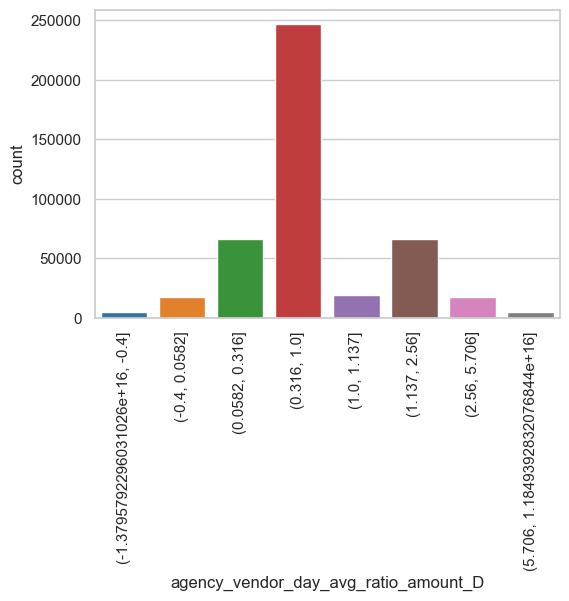

In [68]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_vendor_day_avg_ratio_amount_D', data = df10, hue = 'agency_vendor_day_avg_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

In [69]:
df10['df10_outliners'] = df10['agency_vendor_day_avg_ratio_amount'] > 2.56

df10_outliner = df10[df10['agency_vendor_day_avg_ratio_amount'] > 2.56]
df10_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_vendor_day_avg_ratio_amount,agency_vendor_day_avg_ratio_amount_D,df10_outliners
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.20,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,464.985000,2.822027,"(2.56, 5.706]",True
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,232.387296,3.076502,"(2.56, 5.706]",True
59,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dipboye,K,GENERAL PURCHASE,545.40,ALLEGRA PRINT & IMAGING,2013-07-24,2013-07-26,QUICK-COPY AND REPRODUCTION SERVICES,2013,7,30,Wednesday,201.956818,2.700577,"(2.56, 5.706]",True
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,477.291667,5.001575,"(2.56, 5.706]",True
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,46.303500,4.319112,"(2.56, 5.706]",True


### 3.11. Feature 11: The ratio to average amount by cardholder and merchant

Looking at the dataset, we can find out that there is more than 1 cardholder under one agency, and each cardholder might be responsible for purchase items or services for a specific category. So, my logic is to detect the outliners by the average amount the cardholders spend on a specific merchant category. If the ratio to average or median is too high, it might suggest there is a outliner for that record. 

And the new features of grouping by carholder will aslo follow the procedures presented before and combine with columns 'Month' and 'Day_of_Week' to create new features for benchmarks. 

But first, let us create a new column that combine the cardholder last name and carholder first inital. 

In [70]:
# Create a new column that combine the cardholer last name and first name initial
df['Cardholder_Name'] = df['Cardholder_Last_Name'] + ' ' + df['Cardholder_First_Initial']

In [71]:
# create average spending group by agency and merchant category 
stat_by_agency_merchant_cardholder = df.groupby(['Agency_Name', 'Cardholder_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency_merchant_cardholder = pd.DataFrame(stat_by_agency_merchant_cardholder)
stat_by_agency_merchant_cardholder.columns = ['AVG_amount']
stat_by_agency_merchant_cardholder

AVG_amount
Agency_Name                     Cardholder_Name Merchant_Category                                             
ARDMORE HIGHER EDUCATION CENTER Pollard C       COMPUTER NETWORK/INFORMATION SERVICES                18.340000
                                                MISCELLANEOUS AND SPECIALTY RETAIL STORES            11.640000
                                                SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE ...  345.000000
                                Ray M           BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED          115.120000
                                                CATALOG MERCHANTS                                   -53.344286
...                                                                                                        ...
`DEPARTMENT OF EDUCATION        Ross P          ST. REGIS HOTEL                                     580.530000
                                                TRAVEL AGENCIES                                      24.253731
                                                TROPICANA RESORT AND CASINO                         481.600000
                                                UNITED AIRLINES                                     310.547368
                                                WYNDHAM HOTELS                                       58.000000

[70246 rows x 1 columns]

In [72]:
# add the new feature average spending to the dataset 
df11 = pd.merge(df, stat_by_agency_merchant_cardholder, how='left', on=['Agency_Name', 'Cardholder_Name', 'Merchant_Category'])

df11['agency_merchant_cardholder_avg_ratio_amount'] = np.where(df11['AVG_amount']==0,0, df11['Amount'] / df11['AVG_amount'])
df11['agency_merchant_cardholder_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.911174e-01
std      4.286705e+15
min     -7.901622e+17
25%      3.534415e-01
50%      8.380322e-01
75%      1.200000e+00
max      7.901622e+17
Name: agency_merchant_cardholder_avg_ratio_amount, dtype: float64

In [73]:
# cut by percentile for plotting
var = 'agency_merchant_cardholder_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df11[binned_var] = pd.qcut(df11[var],percentile)
df11[['agency_merchant_cardholder_avg_ratio_amount_D']]

,agency_merchant_cardholder_avg_ratio_amount_D
0,"(0.838, 1.387]"
1,"(1.387, 2.877]"
2,"(1.387, 2.877]"
3,"(1.387, 2.877]"
4,"(1.387, 2.877]"
...,...
442453,"(0.265, 0.838]"
442454,"(0.0369, 0.265]"
442455,"(-0.937, 0.0369]"
442456,"(2.877, 5.752]"


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(-7.901621841216878e+17, -0.937]'),
  Text(1, 0, '(-0.937, 0.0369]'),
  Text(2, 0, '(0.0369, 0.265]'),
  Text(3, 0, '(0.265, 0.838]'),
  Text(4, 0, '(0.838, 1.387]'),
  Text(5, 0, '(1.387, 2.877]'),
  Text(6, 0, '(2.877, 5.752]'),
  Text(7, 0, '(5.752, 7.901621841216878e+17]')])

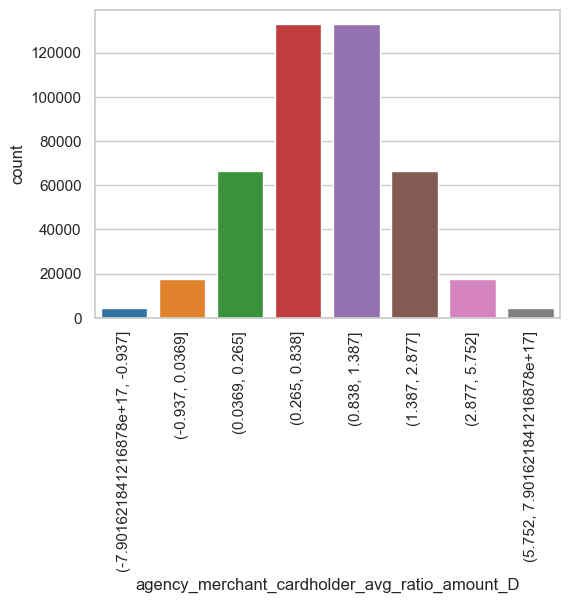

In [74]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_merchant_cardholder_avg_ratio_amount_D', data = df11, hue = 'agency_merchant_cardholder_avg_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

In [75]:
df11['df11_outliners'] = df11['agency_merchant_cardholder_avg_ratio_amount'] > 2.877

df11_outliner = df11[df11['agency_merchant_cardholder_avg_ratio_amount'] > 2.877]
df11_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Cardholder_Name,AVG_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount_D,df11_outliners
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.20,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,DALCOUR K,368.033333,3.565438,"(2.877, 5.752]",True
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,Davis G,129.053182,5.539887,"(2.877, 5.752]",True
57,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Derakhshan,T,IGG RB PURIFIED-25MG EACH|Freight charges EACH,158.49,MILLIPORE AMERICAS,2013-07-25,2013-07-26,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Thursday,Derakhshan T,39.000000,4.063846,"(2.877, 5.752]",True
62,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHYDROGENUHPGR5S...,58.66,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,Dollins D,17.226462,3.405226,"(2.877, 5.752]",True
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,Dzialowski A,569.635926,4.190764,"(2.877, 5.752]",True


### 3.12. Feature 12: The ratio to median amount by cardholder and merchant

In [76]:
# create average spending group by agency and merchant category 
stat_by_agency_merchant_cardholder = df.groupby(['Agency_Name', 'Cardholder_Name', 'Merchant_Category'])['Amount'].median()
stat_by_agency_merchant_cardholder = pd.DataFrame(stat_by_agency_merchant_cardholder)
stat_by_agency_merchant_cardholder.columns = ['Median_amount']
stat_by_agency_merchant_cardholder

Median_amount
Agency_Name                     Cardholder_Name Merchant_Category                                                
ARDMORE HIGHER EDUCATION CENTER Pollard C       COMPUTER NETWORK/INFORMATION SERVICES                       18.34
                                                MISCELLANEOUS AND SPECIALTY RETAIL STORES                   11.64
                                                SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE ...         345.00
                                Ray M           BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED                 115.12
                                                CATALOG MERCHANTS                                           38.16
...                                                                                                           ...
`DEPARTMENT OF EDUCATION        Ross P          ST. REGIS HOTEL                                            580.53
                                                TRAVEL AGENCIES                                             25.00
                                                TROPICANA RESORT AND CASINO                                481.60
                                                UNITED AIRLINES                                            510.60
                                                WYNDHAM HOTELS                                              87.00

[70246 rows x 1 columns]

In [77]:
# add the new feature average spending to the dataset 
df12 = pd.merge(df, stat_by_agency_merchant_cardholder, how='left', on=['Agency_Name', 'Cardholder_Name', 'Merchant_Category'])

df12['agency_merchant_cardholder_median_ratio_amount'] = np.where(df12['Median_amount']==0,0, df12['Amount'] / df12['Median_amount'])
df12['agency_merchant_cardholder_median_ratio_amount'].describe()

count    4.424580e+05
mean     1.050664e+02
std      4.860020e+04
min     -8.195918e+02
25%      6.256754e-01
50%      1.000000e+00
75%      1.497567e+00
max      2.379823e+07
Name: agency_merchant_cardholder_median_ratio_amount, dtype: float64

In [78]:
# cut by percentile for plotting
var = 'agency_merchant_cardholder_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df12[binned_var] = pd.qcut(df12[var],percentile)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(-819.593, -1.077]'),
  Text(1, 0, '(-1.077, 0.0764]'),
  Text(2, 0, '(0.0764, 0.492]'),
  Text(3, 0, '(0.492, 1.0]'),
  Text(4, 0, '(1.0, 1.803]'),
  Text(5, 0, '(1.803, 5.599]'),
  Text(6, 0, '(5.599, 17.009]'),
  Text(7, 0, '(17.009, 23798229.625]')])

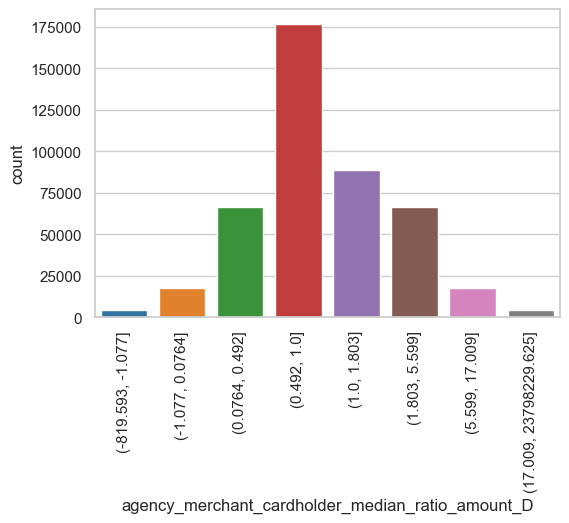

In [79]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_merchant_cardholder_median_ratio_amount_D', data = df12, hue = 'agency_merchant_cardholder_median_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

In [80]:
df12['df12_outliners'] = df12['agency_merchant_cardholder_median_ratio_amount'] > 5.599

df12_outliner = df12[df12['agency_merchant_cardholder_median_ratio_amount'] > 5.599]
df12_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Cardholder_Name,Median_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_median_ratio_amount_D,df12_outliners
39,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gordon,D,Brother Printer MFC7860DW PCE,249.98,Amazon.com,2013-07-26,2013-07-29,BOOK STORES,2013,7,30,Friday,Gordon D,35.990,6.945818,"(5.599, 17.009]",True
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.20,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,DALCOUR K,165.580,7.924870,"(5.599, 17.009]",True
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,Davis G,98.835,7.233672,"(5.599, 17.009]",True
62,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHYDROGENUHPGR5S...,58.66,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,Dollins D,4.190,14.000000,"(5.599, 17.009]",True
63,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHELIUMUHP300CGA580,25.14,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,Dollins D,4.190,6.000000,"(5.599, 17.009]",True


### 3.13. Feature 13: The ratio to average amount by cardholder, merchant, and month

In [81]:
# create average spending group by agency and merchant category 
stat_by_agency_merchant_cardholder_month = df.groupby(['Agency_Name', 'Cardholder_Name', 'Merchant_Category', 'Month'])['Amount'].mean()
stat_by_agency_merchant_cardholder_month = pd.DataFrame(stat_by_agency_merchant_cardholder_month)
stat_by_agency_merchant_cardholder_month.columns = ['AVG_amount']
stat_by_agency_merchant_cardholder_month

AVG_amount
Agency_Name                     Cardholder_Name Merchant_Category                                  Month            
ARDMORE HIGHER EDUCATION CENTER Pollard C       COMPUTER NETWORK/INFORMATION SERVICES              10      18.340000
                                                MISCELLANEOUS AND SPECIALTY RETAIL STORES          11      11.640000
                                                SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE ... 9      345.000000
                                Ray M           BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED         11     115.120000
                                                CATALOG MERCHANTS                                  7     -637.750000
...                                                                                                              ...
`DEPARTMENT OF EDUCATION        Ross P          UNITED AIRLINES                                    9      260.450000
                                                                                                   10     523.800000
                                                                                                   12     199.633333
                                                WYNDHAM HOTELS                                     1     -304.980000
                                                                                                   12     130.596000

[185947 rows x 1 columns]

In [82]:
# add the new feature average spending to the dataset 
df13 = pd.merge(df, stat_by_agency_merchant_cardholder_month, how='left', on=['Agency_Name', 'Cardholder_Name', 'Merchant_Category', 'Month'])

df13['agency_merchant_cardholder_month_avg_ratio_amount'] = np.where(df13['AVG_amount']==0,0, df13['Amount'] / df13['AVG_amount'])
df13['agency_merchant_cardholder_month_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.958415e-01
std      4.487573e+14
min     -1.266826e+17
25%      5.746676e-01
50%      1.000000e+00
75%      1.092573e+00
max      1.263193e+17
Name: agency_merchant_cardholder_month_avg_ratio_amount, dtype: float64

In [83]:
# cut by percentile for plotting
var = 'agency_merchant_cardholder_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df13[binned_var] = pd.qcut(df13[var],percentile)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(-1.2668256604282766e+17, -1.0]'),
  Text(1, 0, '(-1.0, 0.0595]'),
  Text(2, 0, '(0.0595, 0.432]'),
  Text(3, 0, '(0.432, 1.0]'),
  Text(4, 0, '(1.0, 1.266]'),
  Text(5, 0, '(1.266, 2.41]'),
  Text(6, 0, '(2.41, 4.592]'),
  Text(7, 0, '(4.592, 1.2631932489255451e+17]')])

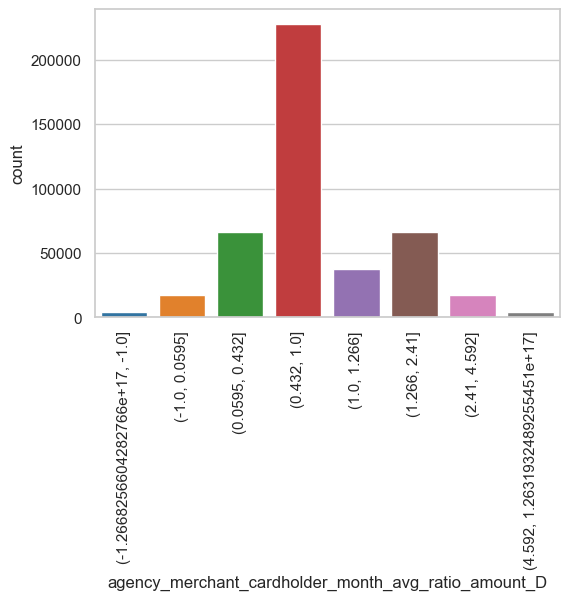

In [84]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_merchant_cardholder_month_avg_ratio_amount_D', data = df13, hue = 'agency_merchant_cardholder_month_avg_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

In [85]:
df13['df13_outliners'] = df13['agency_merchant_cardholder_month_avg_ratio_amount'] > 2.41

df13_outliner = df13[df13['agency_merchant_cardholder_month_avg_ratio_amount'] > 2.41]
df13_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Cardholder_Name,AVG_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount_D,df13_outliners
62,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHYDROGENUHPGR5S...,58.66,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,Dollins D,19.274000,3.043478,"(2.41, 4.592]",True
78,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Fokar,M,QIAPREP SPIN MINIPREP KIT KIT|RNEASY MINI PLAN...,1943.29,QIAGEN INC,2013-07-26,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,Fokar M,615.455000,3.157485,"(2.41, 4.592]",True
108,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Haseley,S,GENERAL PURCHASE,571.68,WAL-MART #4241,2013-07-28,2013-07-29,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Sunday,Haseley S,171.567500,3.332100,"(2.41, 4.592]",True
111,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Heaton,D,GENERAL PURCHASE,335.84,FENTON OFFICE SUP01 OF 01,2013-07-25,2013-07-29,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,30,Thursday,Heaton D,120.022857,2.798134,"(2.41, 4.592]",True
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,Munday T,418.786897,7.369309,"(4.592, 1.2631932489255451e+17]",True


### 3.14. Feature 14: The ratio to median amount by cardholder, merchant, and month

In [86]:
# create average spending group by agency and merchant category 
stat_by_agency_merchant_cardholder_month = df.groupby(['Agency_Name', 'Cardholder_Name', 'Merchant_Category', 'Month'])['Amount'].median()
stat_by_agency_merchant_cardholder_month = pd.DataFrame(stat_by_agency_merchant_cardholder_month)
stat_by_agency_merchant_cardholder_month.columns = ['Median_amount']
stat_by_agency_merchant_cardholder_month

Median_amount
Agency_Name                     Cardholder_Name Merchant_Category                                  Month               
ARDMORE HIGHER EDUCATION CENTER Pollard C       COMPUTER NETWORK/INFORMATION SERVICES              10             18.34
                                                MISCELLANEOUS AND SPECIALTY RETAIL STORES          11             11.64
                                                SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE ... 9             345.00
                                Ray M           BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED         11            115.12
                                                CATALOG MERCHANTS                                  7            -637.75
...                                                                                                                 ...
`DEPARTMENT OF EDUCATION        Ross P          UNITED AIRLINES                                    9             510.60
                                                                                                   10            523.80
                                                                                                   12            181.80
                                                WYNDHAM HOTELS                                     1            -304.98
                                                                                                   12             87.00

[185947 rows x 1 columns]

In [87]:
# add the new feature average spending to the dataset 
df14 = pd.merge(df, stat_by_agency_merchant_cardholder_month, how='left', on=['Agency_Name', 'Cardholder_Name', 'Merchant_Category', 'Month'])

df14['agency_merchant_cardholder_month_median_ratio_amount'] = np.where(df14['Median_amount']==0,0, df14['Amount'] / df14['Median_amount'])
df14['agency_merchant_cardholder_month_median_ratio_amount'].describe()

count    442458.000000
mean          1.181799
std         271.781091
min     -156400.000000
25%           0.851256
50%           1.000000
75%           1.140258
max       63226.000000
Name: agency_merchant_cardholder_month_median_ratio_amount, dtype: float64

In [88]:
# cut by percentile for plotting
var = 'agency_merchant_cardholder_month_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df14[binned_var] = pd.qcut(df14[var],percentile)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(-156400.001, -1.0]'),
  Text(1, 0, '(-1.0, 0.109]'),
  Text(2, 0, '(0.109, 0.674]'),
  Text(3, 0, '(0.674, 1.0]'),
  Text(4, 0, '(1.0, 1.347]'),
  Text(5, 0, '(1.347, 3.836]'),
  Text(6, 0, '(3.836, 13.149]'),
  Text(7, 0, '(13.149, 63226.0]')])

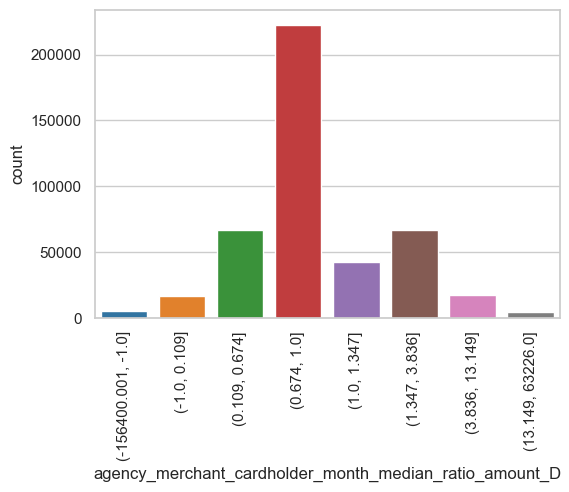

In [89]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_merchant_cardholder_month_median_ratio_amount_D', data = df14, hue = 'agency_merchant_cardholder_month_median_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

In [90]:
df14['df14_outliners'] = df14['agency_merchant_cardholder_month_median_ratio_amount'] > 3.836

df14_outliner = df14[df14['agency_merchant_cardholder_month_median_ratio_amount'] > 3.836]
df14_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Cardholder_Name,Median_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount_D,df14_outliners
37,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Golay,B,MITSUBISHI K-91HG GL CS,94.64,FISHER SCI HUS,2013-07-27,2013-07-29,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Saturday,Golay B,23.00,4.114783,"(3.836, 13.149]",True
62,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHYDROGENUHPGR5S...,58.66,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,Dollins D,4.19,14.000000,"(13.149, 63226.0]",True
63,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHELIUMUHP300CGA580,25.14,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,Dollins D,4.19,6.000000,"(3.836, 13.149]",True
78,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Fokar,M,QIAPREP SPIN MINIPREP KIT KIT|RNEASY MINI PLAN...,1943.29,QIAGEN INC,2013-07-26,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,Fokar M,379.52,5.120389,"(3.836, 13.149]",True
87,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Robinson,D,GENERAL PURCHASE,390.00,NATIONAL SOCCER COACHES A,2013-07-29,2013-07-31,SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE...,2013,7,31,Monday,Robinson D,85.00,4.588235,"(3.836, 13.149]",True


### 3.15. Feature 15: The ratio to average amount by cardholder, merchant, and day of week

In [91]:
# create average spending group by agency and merchant category 
stat_by_agency_merchant_cardholder_day = df.groupby(['Agency_Name', 'Cardholder_Name', 'Merchant_Category', 'Day_of_Week'])['Amount'].mean()
stat_by_agency_merchant_cardholder_day = pd.DataFrame(stat_by_agency_merchant_cardholder_day)
stat_by_agency_merchant_cardholder_day.columns = ['AVG_amount']
stat_by_agency_merchant_cardholder_day

AVG_amount
Agency_Name                     Cardholder_Name Merchant_Category                                  Day_of_Week            
ARDMORE HIGHER EDUCATION CENTER Pollard C       COMPUTER NETWORK/INFORMATION SERVICES              Tuesday       18.340000
                                                MISCELLANEOUS AND SPECIALTY RETAIL STORES          Wednesday     11.640000
                                                SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE ... Tuesday      345.000000
                                Ray M           BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED         Friday       115.120000
                                                CATALOG MERCHANTS                                  Friday        31.330000
...                                                                                                                    ...
`DEPARTMENT OF EDUCATION        Ross P          UNITED AIRLINES                                    Thursday     331.466667
                                                                                                   Tuesday     -283.500000
                                                                                                   Wednesday    352.800000
                                                WYNDHAM HOTELS                                     Thursday      87.000000
                                                                                                   Tuesday        0.000000

[153872 rows x 1 columns]

In [92]:
# add the new feature average spending to the dataset 
df15 = pd.merge(df, stat_by_agency_merchant_cardholder_day, how='left', on=['Agency_Name', 'Cardholder_Name', 'Merchant_Category', 'Day_of_Week'])

df15['agency_merchant_cardholder_day_avg_ratio_amount'] = np.where(df15['AVG_amount']==0,0, df15['Amount'] / df15['AVG_amount'])
df15['agency_merchant_cardholder_day_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.948360e-01
std      3.094700e+15
min     -5.875565e+17
25%      5.071348e-01
50%      1.000000e+00
75%      1.118611e+00
max      5.875565e+17
Name: agency_merchant_cardholder_day_avg_ratio_amount, dtype: float64

In [93]:
# cut by percentile for plotting
var = 'agency_merchant_cardholder_day_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df15[binned_var] = pd.qcut(df15[var],percentile)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '(-5.875564958853576e+17, -0.926]'),
  Text(1, 0, '(-0.926, 0.0592]'),
  Text(2, 0, '(0.0592, 0.383]'),
  Text(3, 0, '(0.383, 1.0]'),
  Text(4, 0, '(1.0, 1.286]'),
  Text(5, 0, '(1.286, 2.512]'),
  Text(6, 0, '(2.512, 5.03]'),
  Text(7, 0, '(5.03, 5.875564958853576e+17]')])

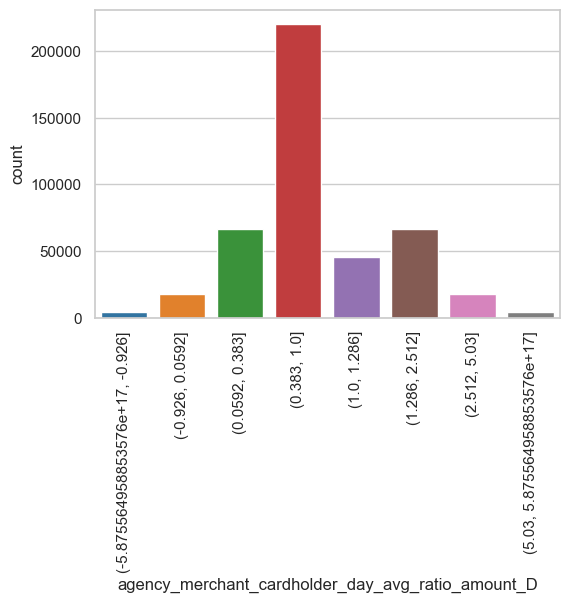

In [94]:
plt.figure(figsize=(6, 4))
g = sns.countplot(x = 'agency_merchant_cardholder_day_avg_ratio_amount_D', data = df15, hue = 'agency_merchant_cardholder_day_avg_ratio_amount_D', legend=False, palette='tab10')

# Rotate x-axis labels
plt.xticks(rotation=90)

In [95]:
df15['df15_outliners'] = df15['agency_merchant_cardholder_day_avg_ratio_amount'] > 2.512

df15_outliner = df15[df15['agency_merchant_cardholder_day_avg_ratio_amount'] > 2.512]
df15_outliner.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Cardholder_Name,AVG_amount,agency_merchant_cardholder_day_avg_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount_D,df15_outliners
39,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gordon,D,Brother Printer MFC7860DW PCE,249.98,Amazon.com,2013-07-26,2013-07-29,BOOK STORES,2013,7,30,Friday,Gordon D,93.410250,2.676152,"(2.512, 5.03]",True
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,Davis G,217.684000,3.284302,"(2.512, 5.03]",True
62,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dollins,D,CYLAIRBREATHING300CGA346 MO|CYLHYDROGENUHPGR5S...,58.66,AIRGAS CENTRAL,2013-07-25,2013-07-26,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Thursday,Dollins D,19.194000,3.056163,"(2.512, 5.03]",True
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,ELECTRICAL PARTS AND EQUIPMENT,2013,7,28,Thursday,Munday T,436.513333,7.070047,"(5.03, 5.875564958853576e+17]",True
124,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,GENERAL PURCHASE,1267.20,MECHANICAL SALES OF OKLA,2013-07-30,2013-07-31,PLUMBING AND HEATING EQUIPMENT AND SUPPLIES,2013,7,31,Tuesday,Munday T,218.293889,5.805018,"(5.03, 5.875564958853576e+17]",True


### 4. Final Analysis

Combine all the outliners column with original dataset. 

In [96]:
final_df = pd.concat([df, df1['df1_outliners'], df2['df2_outliners'], df3['df3_outliners'], df4['df4_outliners'], df5['df5_outliners']
                     , df6['df6_outliners'], df7['df7_outliners'], df8['df8_outliners'], df9['df9_outliners'], df10['df10_outliners']
                     , df11['df11_outliners'], df12['df12_outliners'], df13['df13_outliners'], df14['df14_outliners'], df15['df15_outliners']], axis=1)
final_df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,df6_outliners,df7_outliners,df8_outliners,df9_outliners,df10_outliners,df11_outliners,df12_outliners,df13_outliners,df14_outliners,df15_outliners
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,False,False,False,False,False,False,False,False,False,False
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,False,False,False,False,False,False,False,False,False,False
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,False,True,False,False,False,False,False,False,False,False
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,False,False,False,False,False,False,False,False,False,False
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,False,False,False,False,False,False,False,False,False,False


Then create a new column to calculate how many true values for each transaction, ready for the plotting later on. 

In [97]:
# List of outlier columns (adjust based on your actual column names)
outlier_columns = [f'df{i}_outliners' for i in range(1, 16)]

# Count the number of 'True' values in each row across the outlier columns
final_df['True_Count'] = final_df[outlier_columns].sum(axis=1)
final_df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,df7_outliners,df8_outliners,df9_outliners,df10_outliners,df11_outliners,df12_outliners,df13_outliners,df14_outliners,df15_outliners,True_Count
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,False,False,False,False,False,False,False,False,False,0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,False,False,False,False,False,False,False,False,False,0
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,True,False,False,False,False,False,False,False,False,1
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,False,False,False,False,False,False,False,False,False,0
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,False,False,False,False,False,False,False,False,False,0


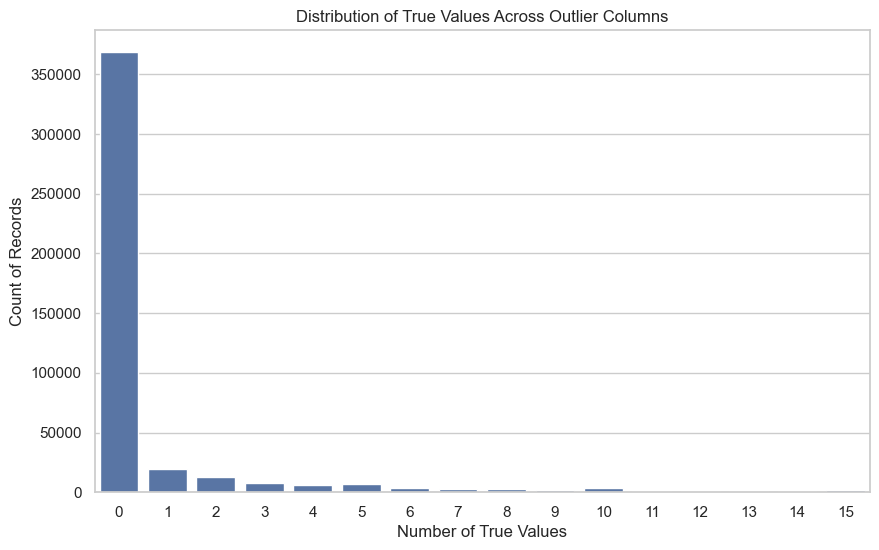

In [98]:
# Create a bar chart to show the distribution of the 'true_count'
plt.figure(figsize=(10, 6))
sns.countplot(x='True_Count', data=final_df)
plt.xlabel('Number of True Values')
plt.ylabel('Count of Records')
plt.title('Distribution of True Values Across Outlier Columns')
plt.show()

In [99]:
# Create a summary table that shows the count of records for each possible number of 'True' values
summary_table = final_df['True_Count'].value_counts().reset_index()
summary_table.columns = ['Number of True Values', 'Count of Records']
summary_table = summary_table.sort_values(by='Number of True Values', ascending=True).reset_index(drop=True)
summary_table

,Number of True Values,Count of Records
0,0,368537
1,1,19494
2,2,12551
3,3,7430
4,4,5928
5,5,6887
6,6,3501
7,7,3057
8,8,2688
9,9,2093


Looking at the bar chart and the table, we can find out over 73,000 rows of transaction have at least one true values for all the 15 outliners, and the each of them become more susipicious as the total number of the true value increase. 

In [100]:
final_df[final_df['True_Count'] == 15]

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,df7_outliners,df8_outliners,df9_outliners,df10_outliners,df11_outliners,df12_outliners,df13_outliners,df14_outliners,df15_outliners,True_Count
121,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Munday,T,8205 LNL 26D RH LESS CYL K EAC|TA2714 4 5X4 26...,3086.17,ANIXTER INC,2013-07-11,2013-07-31,...,True,True,True,True,True,True,True,True,True,15
250,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Heusel,J,JANITORIAL SUPPLIES NMB,1460.03,"GRIMSLEY'S, INC.",2013-07-25,2013-07-29,...,True,True,True,True,True,True,True,True,True,15
256,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Heusel,J,PUMP WITH SIDE MOUNTED FL EA,1691.68,WW GRAINGER,2013-07-26,2013-07-29,...,True,True,True,True,True,True,True,True,True,15
328,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Heusel,J,GENERAL PURCHASE,1161.04,SPECTRUM PAINT - STILLWAT,2013-07-25,2013-07-29,...,True,True,True,True,True,True,True,True,True,15
340,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Heusel,J,JANITORIAL SUPPLIES NMB,1831.89,"GRIMSLEY'S, INC.",2013-07-26,2013-07-29,...,True,True,True,True,True,True,True,True,True,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441312,2014-05-01,98000,GRAND RIVER DAM AUTH.,Stroup,P,3816x4YellowZincFinishSAEJ EA|58YellowZincFini...,1717.02,FASTENAL COMPANY01,2014-05-13,2014-05-14,...,True,True,True,True,True,True,True,True,True,15
441390,2014-05-01,98000,GRAND RIVER DAM AUTH.,Prince,S,QUICK-STOR-LETTER/LEGAL S CT,599.88,STAPLES,2014-05-23,2014-05-26,...,True,True,True,True,True,True,True,True,True,15
441725,2014-06-01,98000,GRAND RIVER DAM AUTH.,Stroup,P,QuickConnectStrapsCDPadSDR EA|6STRETCHSTOPGree...,1333.25,FASTENAL COMPANY01,2014-06-24,2014-06-25,...,True,True,True,True,True,True,True,True,True,15
441824,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,Invoice from Fletcher-Rein EA,102869.94,FLETCHER REINHARDT CO,2014-06-04,2014-06-06,...,True,True,True,True,True,True,True,True,True,15


Take a look at those rows has 15 true counts, most them are susipicous because the spending amount is high. For example, the row 441824's spending amount is $102869.94, which is a really expensive spending in our common sense. It is not 100 percent that those records above are definitely the fraud, but we do need to take more attention on those records. 

In [ ]:
['agency_merchant_avg_ratio_amount']

In [114]:
data = pd.concat([df, df1.iloc[:, 16], df2.iloc[:, 16], df3.iloc[:, 16], df4.iloc[:, 16], df5.iloc[:, 16],
                  df6.iloc[:, 16], df7.iloc[:, 16], df8.iloc[:, 16], df9.iloc[:, 16], df10.iloc[:, 16],
                  df11.iloc[:, 17], df12.iloc[:, 17], df13.iloc[:, 17], df14.iloc[:, 17], df15.iloc[:, 17]], axis=1)

In [117]:
data.dtypes

Year_Month                                              datetime64[ns]
Agency_Number                                                    int64
Agency_Name                                                     object
Cardholder_Last_Name                                            object
Cardholder_First_Initial                                        object
Description                                                     object
Amount                                                         float64
Vendor                                                          object
Transaction_Date                                        datetime64[ns]
Posted_Date                                             datetime64[ns]
Merchant_Category                                               object
Year                                                             int32
Month                                                            int32
Week_Number                                                     UInt32
Day_of

In [118]:
data

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,...,1.243789,1.318519,1.135566,1.000000,1.233256,1.000000,1.000000,1.000000,1.000000,1.000000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,...,0.781845,1.795426,1.064881,1.064881,1.032701,1.435311,1.138765,0.784342,0.853600,2.198382
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,...,1.801787,6.380146,1.000000,1.000000,1.495491,2.106319,2.106319,1.000000,1.000000,1.000000
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,...,1.544294,2.710249,1.593246,2.686455,1.630422,1.898048,1.935931,1.000000,1.000000,1.000000
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,...,0.876658,1.682158,0.755700,1.078748,1.124295,1.938502,2.287686,1.529105,1.529105,1.529105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442453,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,992.00,TOTAL VALVE SYSTEMS,2014-06-20,2014-06-23,...,0.181678,0.278027,0.296208,1.000000,1.071274,0.284350,1.153488,0.296208,1.000000,1.961928
442454,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,2415.00,PRYOR WASTE & RECYCLING L,2014-06-20,2014-06-23,...,1.752323,2.610811,0.780606,1.008351,1.277440,0.082185,1.139151,0.144522,1.000000,0.143738
442455,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,177.50,ACCURATE ENVIROMENTAL LAB,2014-06-20,2014-06-23,...,1.548287,1.651163,1.139037,1.224138,1.625954,0.030828,0.460800,0.017338,0.378610,0.021799
442456,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,32457.00,RED BUD SERVICE INC,2014-06-19,2014-06-23,...,11.807330,44.797317,2.912060,37.999180,6.238856,3.096582,10.783200,1.911419,1.911419,5.175742


In [119]:
data.to_csv('Credit Card Assignment Data.csv', index=False)